In [1]:
import json, sys, random
import numpy as np

In [2]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras import initializers, layers, models
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
%matplotlib inline

Using TensorFlow backend.


In [3]:
from PIL import Image, ImageDraw 
from matplotlib import pyplot as plt
from keras.utils import to_categorical

In [4]:
# download dataset from json object
np.random.seed(42)
f = open(r'C:/Users/R&B/Desktop/Fall 2019/OR-610/shipsnet.json')
dataset = json.load(f)
f.close()
input_data = np.array(dataset['data']).astype('uint8')
output_data = np.array(dataset['labels']).astype('uint8')
input_data.shape

(4000, 19200)

Decribing the Dataset

In [5]:
def describeData(a,b):
    print('Total number of images: {}'.format(len(a)))
    print('Number of NoShip Images: {}'.format(np.sum(b==0)))
    print('Number of Ship Images: {}'.format(np.sum(b==1)))
    print('Percentage of positive images: {:.2f}%'.format(100*np.mean(b)))
    print('Image shape (Width, Height, Channels): {}'.format(a[0].shape))
describeData(input_data,output_data)

Total number of images: 4000
Number of NoShip Images: 3000
Number of Ship Images: 1000
Percentage of positive images: 25.00%
Image shape (Width, Height, Channels): (19200,)


plotting with red, blue and green

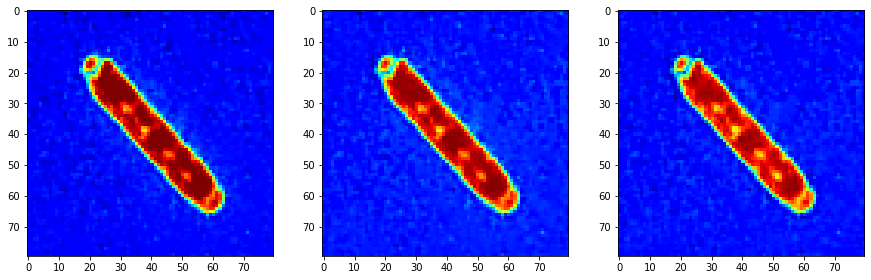

In [6]:
n_spectrum = 3 # color chanel (RGB)
weight = 80
height = 80
X = input_data.reshape([-1, n_spectrum, weight, height])
X[0].shape
pic = X[0]

rad_spectrum = pic[0]
green_spectrum = pic[1]
blue_spectum = pic[2]
plt.figure(2, figsize = (5*3, 5*1))
plt.set_cmap('jet')

# show each channel
plt.subplot(1, 3, 1)
plt.imshow(rad_spectrum)

plt.subplot(1, 3, 2)
plt.imshow(green_spectrum)

plt.subplot(1, 3, 3)
plt.imshow(blue_spectum)
    
plt.show()

Plotting the data

In [7]:
y = to_categorical(output_data, 2)
indexes = np.arange(4000)
np.random.shuffle(indexes)
X_train = X[indexes].transpose([0,2,3,1])
y_train = y[indexes]
X_train = X_train/255

Pre-process the Data

In [8]:
np.random.seed(42)
X_train.shape

(4000, 80, 80, 3)

In [9]:
from keras import optimizers
opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

W1124 18:59:01.276871 10384 deprecation_wrapper.py:119] From C:\Users\Public\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1124 18:59:01.276871 10384 deprecation_wrapper.py:119] From C:\Users\Public\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1124 18:59:01.276871 10384 deprecation_wrapper.py:119] From C:\Users\Public\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1124 18:59:01.332801 10384 deprecation_wrapper.py:119] From C:\Users\Public\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1124 18:59:01.338798 10384 deprecation_wrapper.py:119] From C:\Users\Publi

Train on 3200 samples, validate on 800 samples
Epoch 1/5
 - 50s - loss: 0.3328 - acc: 0.8559 - val_loss: 0.2127 - val_acc: 0.9387
Epoch 2/5
 - 33s - loss: 0.1916 - acc: 0.9222 - val_loss: 0.1194 - val_acc: 0.9613
Epoch 3/5
 - 33s - loss: 0.1270 - acc: 0.9472 - val_loss: 0.0724 - val_acc: 0.9750
Epoch 4/5
 - 34s - loss: 0.0980 - acc: 0.9628 - val_loss: 0.0501 - val_acc: 0.9812
Epoch 5/5
 - 32s - loss: 0.0744 - acc: 0.9744 - val_loss: 0.0421 - val_acc: 0.9862


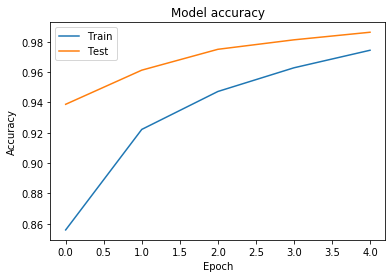

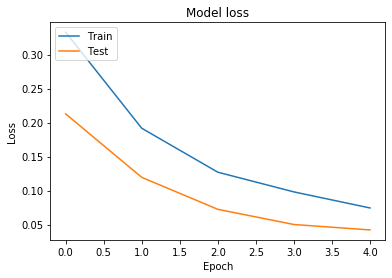

In [10]:
#CNN with Dropout=0.25
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model1.add(Dropout(0.25))

model1.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model1.add(Dropout(0.25))

model1.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model1.add(Dropout(0.25))

model1.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.25))

model1.add(Dense(2, activation='softmax'))
# optimization setup
model1.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy'])

# training
history=model1.fit(
    X_train, 
    y_train,
    batch_size=32,
    epochs=5,
    validation_split=0.2,
    shuffle=True,
    verbose=2)
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [11]:
#saving the model and model weights for convolution network with dropout
from keras.models import load_model
model1.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
model1.save_weights('my_model_weights.h5')


In [12]:
image = Image.open('C:/Users/R&B/Desktop/Fall 2019/OR-610/scenes/sfbay_1.png')
pix = image.load()
n_spectrum = 3
width = image.size[0]
height = image.size[1]

In [13]:
# creat vector
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(pix[x, y][chanel])
picture_vector = np.array(picture_vector).astype('uint8')
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0)

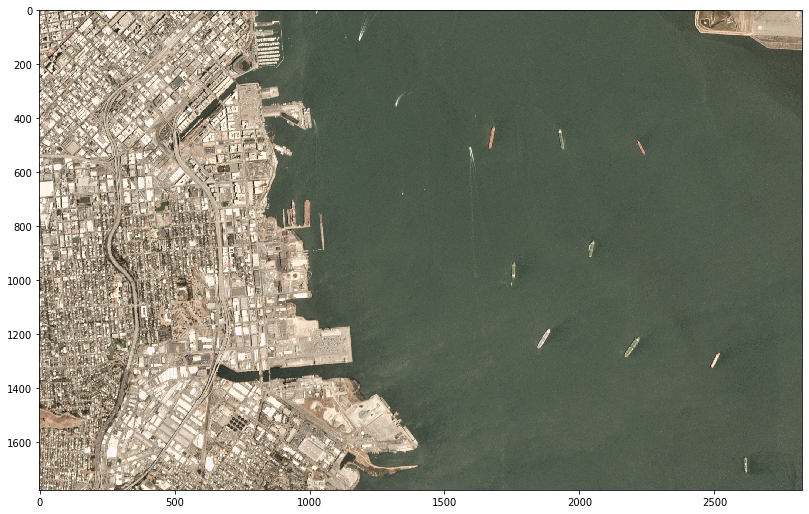

In [14]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3, 1, 1)
plt.imshow(picture_tensor)

plt.show()

In [15]:
picture_tensor = picture_tensor.transpose(2,0,1)


In [16]:
def cutting(x, y):
    area_study = np.arange(3*80*80).reshape(3, 80, 80)
    for i in range(80):
        for j in range(80):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 80, 80])
    area_study = area_study.transpose([0,2,3,1])
    area_study = area_study / 255
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study

In [17]:
def not_near(x, y, s, coordinates):
    result = True
    for e in coordinates:
        if x+s > e[0][0] and x-s < e[0][0] and y+s > e[0][1] and y-s < e[0][1]:
            result = False
    return result

In [18]:
def show_ship(x, y, acc, thickness=5):   
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1

    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+80] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+80][x+i] = -1

X:810 Y:10  [[0.00502028 0.9949797 ]]


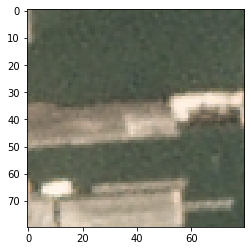

X:1640 Y:410  [[0.01127765 0.9887223 ]]


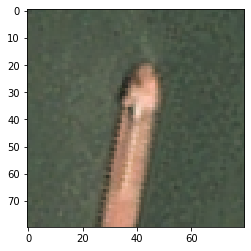

X:1890 Y:420  [[0.07118516 0.9288148 ]]


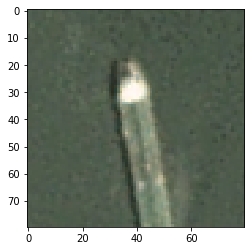

X:2190 Y:460  [[0.02162582 0.97837424]]


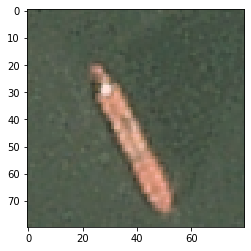

X:950 Y:690  [[0.02871425 0.9712857 ]]


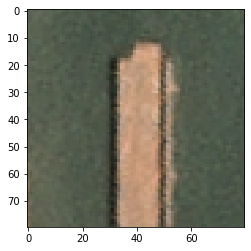

X:1720 Y:920  [[0.05403592 0.9459641 ]]


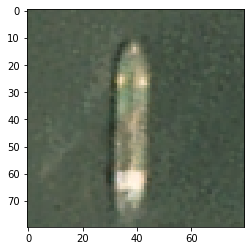

X:1840 Y:1160  [[0.02679244 0.97320753]]


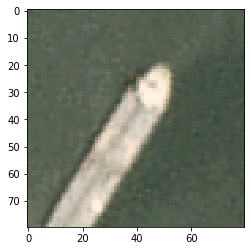

X:2160 Y:1190  [[0.04641344 0.95358664]]


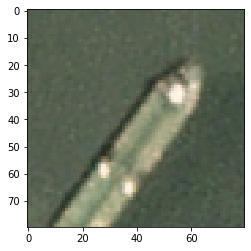

X:2460 Y:1250  [[0.02728444 0.9727156 ]]


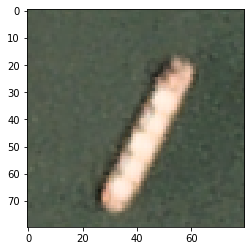

X:1290 Y:1650  [[0.05530648 0.9446935 ]]


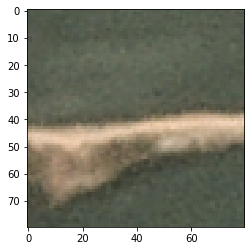

X:2740 Y:1690  

In [19]:
#CNN with Dropout
step = 10; coordinates = []
for y in range(int((height-(80-step))/step)):
    for x in range(int((width-(80-step))/step) ):
        area = cutting(x*step, y*step)
        result = model1.predict(area)
        if result[0][1] > 0.90 and not_near(x*step,y*step, 88, coordinates):
            coordinates.append([[x*step, y*step], result])
            print(result)
            plt.imshow(area[0])
            plt.show()

Using the CNN with Dropout


In [20]:
for e in coordinates:
    show_ship(e[0][0], e[0][1], e[1][0][1])

In [21]:
picture_tensor = picture_tensor.transpose(1,2,0)
picture_tensor.shape


(1777, 2825, 3)

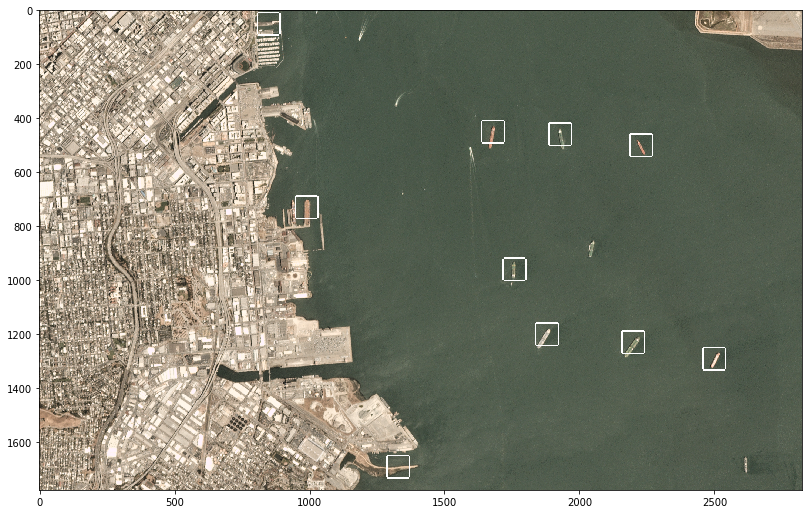

In [22]:
#With Dropout
plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)

plt.show()

Its interesting to see where the false alarms occured - typically on areas with a strong linear feature that resembles the shape of a ship.

Pre-Trained- VGG16()

In [26]:
#using a pre-trained model
from keras.layers import Input
from keras.models import Model
from keras.applications import VGG16
model4 = VGG16(weights= None,include_top=False,input_tensor=Input(shape=(80,80, 3)))
input1 = Input(shape=(80,80,3),name = 'image_input')

output_vgg16_conv = model4(input1)

#Add the fully-connected layers 
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(32, activation='relu', name='fc1')(x)
x = Dense(2, activation='softmax', name='predictions')(x)

#Create your own model 
my_model = Model(inputs = input1, outputs = x)
#In the summary, weights and layers from VGG part will be hidden, but they will be fit during the training
my_model.summary()
#saving the model and model weights for convolution network with dropout
from keras.models import load_model
my_model.save('my_model_VGG.h5')  # creates a HDF5 file 'my_model.h5'
my_model.save_weights('my_model_VGG_weights.h5')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 80, 80, 3)         0         
_________________________________________________________________
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
fc1 (Dense)                  (None, 32)                65568     
_________________________________________________________________
predictions (Dense)          (None, 2)                 66        
Total params: 14,780,322
Trainable params: 14,780,322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# optimization setup
opt2 = optimizers.Adam(lr=10e-02, beta_1=0.9, beta_2=0.999, amsgrad=False)
my_model.compile(
    loss='binary_crossentropy',
    optimizer=opt2,
    metrics=['accuracy'])

# training
history=my_model.fit(
    X_train, 
    y_train,
    batch_size=32,
    epochs=5,
    validation_split=0.2,
    shuffle=True,
    verbose=2)
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Train on 3200 samples, validate on 800 samples
Epoch 1/5
 - 2014s - loss: 4.0395 - acc: 0.7453 - val_loss: 3.7070 - val_acc: 0.7688
Epoch 2/5


Fully-Connected Layer 

In [ ]:
model2= Sequential() 
model2.add(Dense(50,activation = "relu"))
model2.add(Dense(100,activation = "relu"))

model2.add(Dense(100,activation = "relu"))
model2.add(Flatten())
model2.add(Dense(2, activation='softmax'))

#saving the model and model weights for convolution network with dropout
from keras.models import load_model
model2.save('my_model_FCC.h5')  # creates a HDF5 file 'my_model.h5'
model2.save_weights('my_model_FCC_weights.h5')


In [ ]:
# optimization setup
model2.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['accuracy'])

# training
history=model2.fit(
    X_train, 
    y_train,
    batch_size=32,
    epochs=5,
    validation_split=0.2,
    shuffle=True,
    verbose=2)
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Fully Connected Layer With Regularization

In [ ]:
#with L2-Norm Regularization
from keras import regularizers
opt = optimizers.Adam(lr=10e-06, beta_1=0.9, beta_2=0.999, amsgrad=False)
model3= Sequential()
model3.add(Dense(50,activation = "relu"))
model3.add(Dense(50,activation = "relu"))

model3.add(Dense(50,activation = "relu", kernel_regularizer=regularizers.l2(0.01)))
model3.add(Flatten())
model3.add(Dense(2, activation='softmax'))
#saving the model and model weights for convolution network with dropout
from keras.models import load_model
model3.save('my_model_FCC_REG.h5')  # creates a HDF5 file 'my_model.h5'
model3.save_weights('my_model_FCC_REG_weights.h5')


In [ ]:

# optimization setup
model3.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['accuracy'])

# training
history=model3.fit(
    X_train, 
    y_train,
    batch_size=32,
    epochs=5,
    validation_split=0.2,
    shuffle=True,
    verbose=2)
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
picture_tensor = picture_tensor.transpose(2,0,1)


In [ ]:
def cutting(x, y):
    area_study = np.arange(3*80*80).reshape(3, 80, 80)
    for i in range(80):
        for j in range(80):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 80, 80])
    area_study = area_study.transpose([0,2,3,1])
    area_study = area_study / 255
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study

In [ ]:
def not_near(x, y, s, coordinates):
    result = True
    for e in coordinates:
        if x+s > e[0][0] and x-s < e[0][0] and y+s > e[0][1] and y-s < e[0][1]:
            result = False
    return result

In [ ]:
def show_ship(x, y, acc, thickness=5):   
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1

    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+80] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+80][x+i] = -1

Comparing the predictions with our Model

In [ ]:
#VGG16-Pre Trained
step = 10; coordinates = []
for y in range(int((height-(80-step))/step)):
    for x in range(int((width-(80-step))/step) ):
        area = cutting(x*step, y*step)
        result = my_model.predict(area)
        if result[0][1] > 0.90 and not_near(x*step,y*step, 88, coordinates):
            coordinates.append([[x*step, y*step], result])
            print(result)
            plt.imshow(area[0])
            plt.show()

In [ ]:
for e in coordinates:
    show_ship(e[0][0], e[0][1], e[1][0][1])

In [ ]:
picture_tensor = picture_tensor.transpose(1,2,0)
picture_tensor.shape


In [ ]:
#VGG 16
plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)

plt.show()
